<a href="https://colab.research.google.com/github/kevinokelly94/for/blob/main/copy_of_seasonal_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.gofplots import qqplot
from statsmodels.tsa.stattools import adfuller
from tqdm import tqdm_notebook
from itertools import product
from typing import Union

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
df = pd.read_csv("/content/archive (2).zip")

df.head()


,Date,Employees
0,1/1/1990,1064.5
1,2/1/1990,1074.5
2,3/1/1990,1090.0
3,4/1/1990,1097.4
4,5/1/1990,1108.7


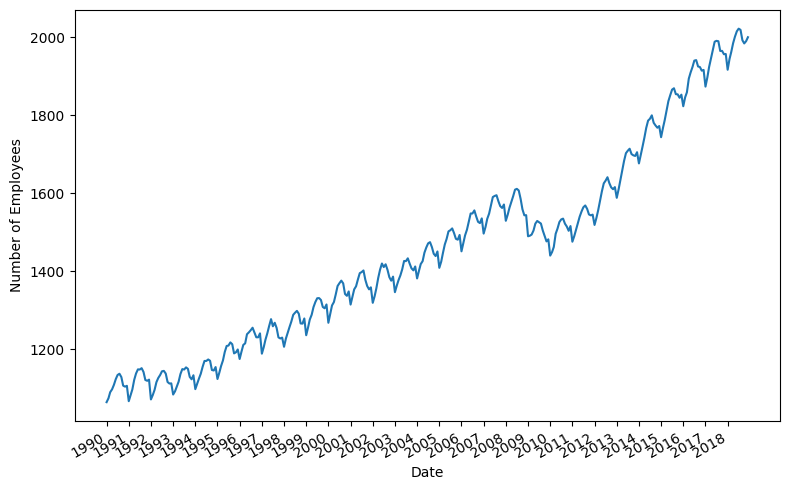

In [ ]:

fig, ax = plt.subplots(figsize=(8, 5))


df['Date'] = pd.to_datetime(df['Date'])

# Plot the data
ax.plot(df['Date'], df['Employees'])  # Adjust 'Employees' to match your column name
ax.set_xlabel('Date')
ax.set_ylabel('Number of Employees')

# Set x-axis ticks
dates = df['Date'].dt.year.unique()
plt.xticks(df['Date'][::12], dates[::1])

fig.autofmt_xdate()
plt.tight_layout()

# Save the figure
plt.savefig('figures/CH08_F01_peixeiro.png', dpi=300)

# Show the plot
plt.show()

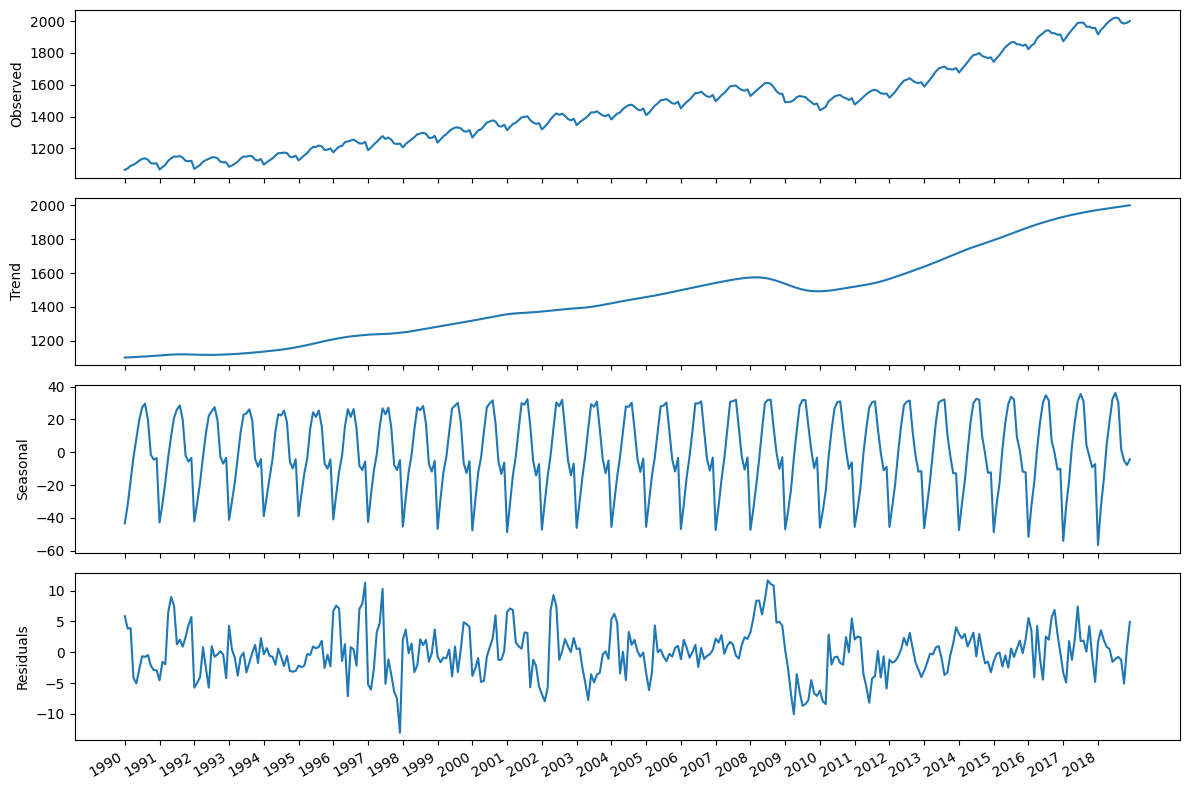

In [ ]:

# Perform decomposition
decomposition = STL(df['Employees'], period=12).fit()

# Create subplots
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(12, 8))

# Plot observed data
ax1.plot(decomposition.observed)
ax1.set_ylabel('Observed')

# Plot trend component
ax2.plot(decomposition.trend)
ax2.set_ylabel('Trend')

# Plot seasonal component
ax3.plot(decomposition.seasonal)
ax3.set_ylabel('Seasonal')

# Plot residual component
ax4.plot(decomposition.resid)
ax4.set_ylabel('Residuals')

# Set x-axis ticks
plt.xticks(np.arange(0, len(df), 12), df['Date'].dt.year.unique())

fig.autofmt_xdate()
plt.tight_layout()

# Save the figure
plt.savefig('figures/CH08_F04_peixeiro.png', dpi=300)

# Show the plot
plt.show()

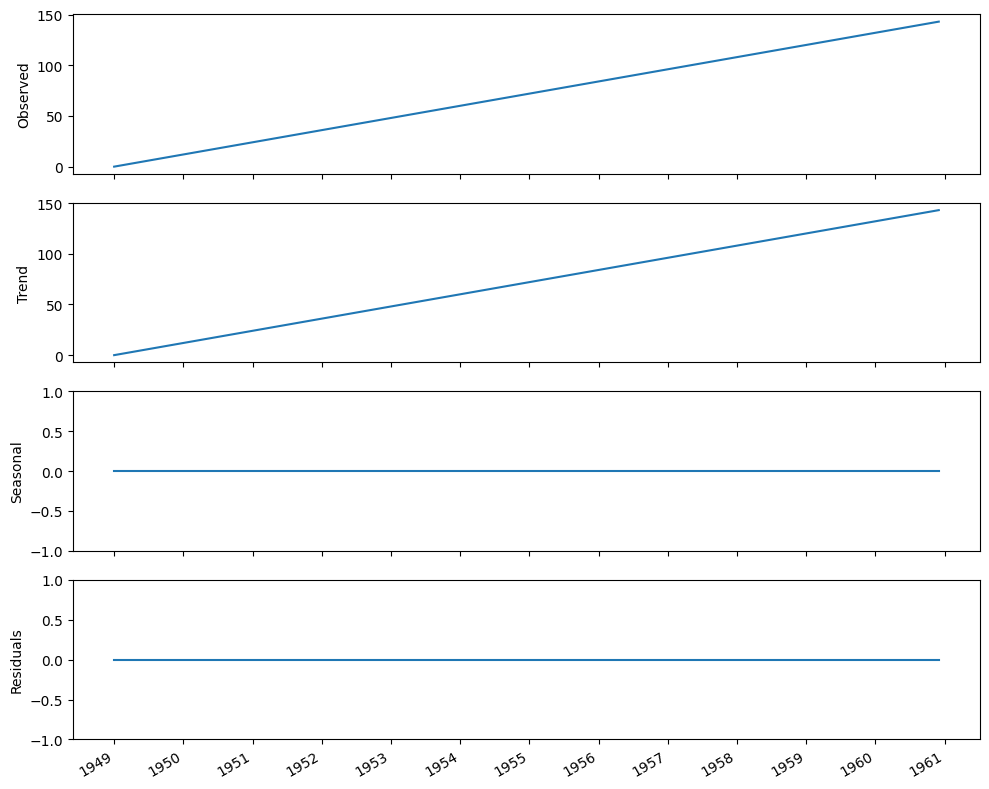

In [ ]:
linear_ts = np.arange(0, 144, 1)

decomposition = STL(linear_ts, period=12).fit()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(10,8))

ax1.plot(decomposition.observed)
ax1.set_ylabel('Observed')

ax2.plot(decomposition.trend)
ax2.set_ylabel('Trend')

ax3.plot(decomposition.seasonal)
ax3.set_ylabel('Seasonal')
ax3.set_ylim(-1, 1)

ax4.plot(decomposition.resid)
ax4.set_ylabel('Residuals')
ax4.set_ylim(-1, 1)

plt.xticks(np.arange(0, 145, 12), np.arange(1949, 1962, 1))

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/CH08_F05_peixeiro.png', dpi=300)

In [ ]:
ad_fuller_result = adfuller(df['Employees'])

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: 0.9012844235569791
p-value: 0.9931070655289933


In [ ]:
df_diff = np.diff(df['Employees'], n=1)

ad_fuller_result = adfuller(df_diff)

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -3.068278900052177
p-value: 0.028991505238964523


In [ ]:
df_diff_seasonal_diff = np.diff(df_diff, n=12)

ad_fuller_result = adfuller(df_diff_seasonal_diff)

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -24.42618841574083
p-value: 0.0


In [ ]:
df_diff2 = np.diff(df_diff, n=1)

ad_fuller_result = adfuller(df_diff2)

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -5.139384517026667
p-value: 1.1675665321913003e-05


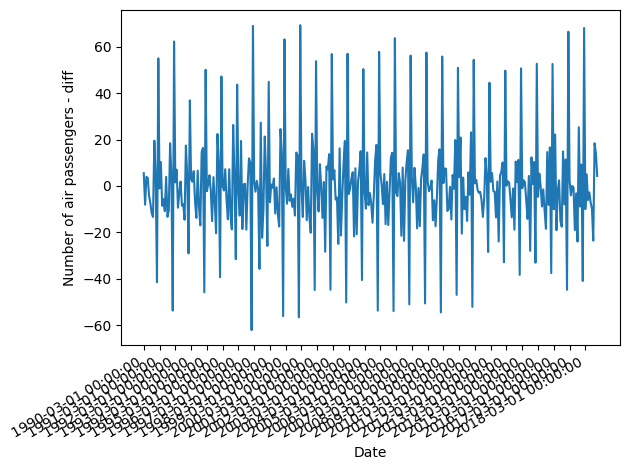

In [ ]:
fig, ax = plt.subplots()

# Plot the differenced data
ax.plot(df['Date'][2:], df_diff2)
ax.set_xlabel('Date')
ax.set_ylabel('Number of air passengers - diff')

# Set x-axis ticks
ax.set_xticks(df['Date'][2::12])  # Set ticks every 12 months
ax.set_xticklabels(df['Date'][2::12], rotation=45)  # Rotate x-axis labels for better readability

fig.autofmt_xdate()
plt.tight_layout()

# Save the figure
plt.savefig('figures/CH07_F01_peixeiro_diff2.png', dpi=300)

# Show the plot
plt.show()

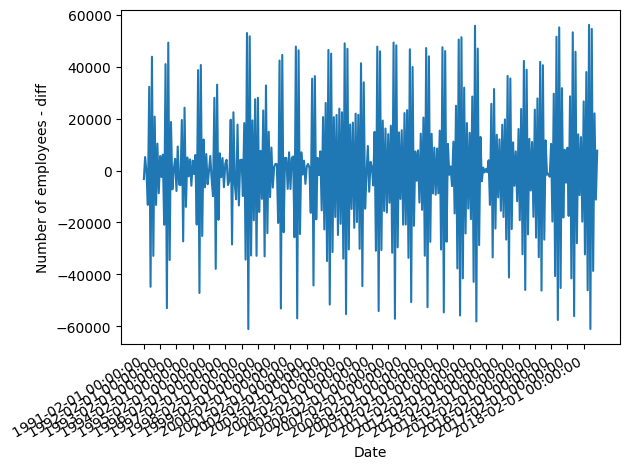

In [ ]:
fig, ax = plt.subplots()

# Plot the differenced data
ax.plot(df['Date'][13:], df_diff_seasonal_diff)
ax.set_xlabel('Date')
ax.set_ylabel('Number of employees - diff')

# Set x-axis ticks
ax.set_xticks(df['Date'][13::12])  # Set ticks every 12 months starting from the 13th month
ax.set_xticklabels(df['Date'][13::12], rotation=45)  # Rotate x-axis labels for better readability

fig.autofmt_xdate()
plt.tight_layout()

# Save the figure
plt.savefig('figures/CH07_F01_peixeiro_diff2.png', dpi=300)

# Show the plot
plt.show()

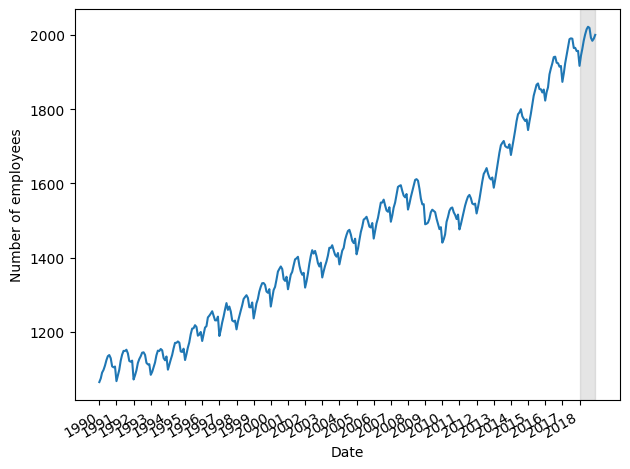

In [ ]:
fig, ax = plt.subplots()

# Plot the data
ax.plot(df['Date'], df['Employees'])
ax.set_xlabel('Date')
ax.set_ylabel('Number of employees')

# Set x-axis ticks
ax.set_xticks(df['Date'][::12])
ax.set_xticklabels(df['Date'].dt.year.unique(), rotation=45)

# Calculate the index range for the shaded area (last year of data)
last_year_start = len(df) - 12
last_year_end = len(df)

# Shade the last year of data
ax.axvspan(df['Date'].iloc[last_year_start], df['Date'].iloc[last_year_end - 1], color='#808080', alpha=0.2)

fig.autofmt_xdate()
plt.tight_layout()

# Save the figure
plt.savefig('figures/CH08_F08_peixeiro.png', dpi=300)

# Show the plot
plt.show()

In [ ]:
def optimize_ARIMA(train, order_list, d) -> pd.DataFrame:

    results = []

    for order in tqdm_notebook(order_list):
        try:
            model = SARIMAX(train, order=(order[0], d, order[1]), simple_differencing=False).fit(disp=False)
        except:
            continue

        aic = model.aic
        results.append([order, aic])

    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)', 'AIC']

    #Sort in ascending order, lower AIC is better

    return result_df

In [ ]:
def optimize_SARIMA(train, order_list, d, D, s) -> pd.DataFrame:

    results = []

    for order in tqdm_notebook(order_list):
        try:
            model = SARIMAX(
                train,
                order=(order[0], d, order[1]),
                seasonal_order=(order[2], D, order[3], s),
                simple_differencing=False).fit(disp=False)
        except:
            continue
        nParams=sum(order)
        aic = model.aic
        results.append([nParams, order, aic])

    result_df = pd.DataFrame(results)
    result_df.columns = ['# of Params','(p,q,P,Q)', 'AIC']

    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)

    return result_df

In [ ]:
ps = range(0, 13, 1)
qs = range(0, 13, 1)
Ps = [0]
Qs = [0]

d = 2
D = 0
s = 12

ARIMA_order_list = list(product(ps, qs, Ps, Qs))

train = df['Employees'][:-12]

ARIMA_result_df = optimize_SARIMA(train, ARIMA_order_list, d, D, s)
ARIMA_result_df

  0%|          | 0/169 [00:00<?, ?it/s]

,# of Params,"(p,q,P,Q)",AIC
0,22,"(11, 11, 0, 0)",2233.422029
1,18,"(11, 7, 0, 0)",2236.918418
2,24,"(12, 12, 0, 0)",2238.124554
3,19,"(11, 8, 0, 0)",2238.565036
4,17,"(11, 6, 0, 0)",2240.072588
...,...,...,...
164,3,"(3, 0, 0, 0)",2918.753185
165,3,"(2, 1, 0, 0)",2918.827091
166,2,"(0, 2, 0, 0)",2921.094396
167,1,"(1, 0, 0, 0)",2944.352251


In [ ]:
ps = range(0, 4, 1)
qs = range(0, 4, 1)
Ps = range(0, 4, 1)
Qs = range(0, 4, 1)

SARIMA_order_list = list(product(ps, qs, Ps, Qs))

train = df['Employees'][:-12]

d = 1
D = 1
s = 12

SARIMA_result_df = optimize_SARIMA(train, SARIMA_order_list, d, D, s)
SARIMA_result_df

  0%|          | 0/256 [00:00<?, ?it/s]

,# of Params,"(p,q,P,Q)",AIC
0,4,"(1, 2, 0, 1)",677.810304
1,5,"(3, 1, 0, 1)",679.015166
2,4,"(2, 1, 0, 1)",679.049667
3,5,"(1, 3, 0, 1)",679.508705
4,4,"(3, 0, 0, 1)",679.551738
...,...,...,...
251,2,"(0, 2, 0, 0)",707.280537
252,7,"(0, 1, 3, 3)",707.487879
253,0,"(0, 0, 0, 0)",710.537725
254,1,"(1, 0, 0, 0)",712.202838


In [ ]:
ARIMA_model = SARIMAX(train, order=(11,2,3), simple_differencing=False)
ARIMA_model_fit = ARIMA_model.fit(disp=False)

print(ARIMA_model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:              Employees   No. Observations:                  120
Model:              SARIMAX(11, 2, 3)   Log Likelihood                -393.364
Date:                Thu, 09 May 2024   AIC                            816.729
Time:                        20:28:50   BIC                            858.289
Sample:                             0   HQIC                           833.604
                                - 120                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0216      0.040    -25.780      0.000      -1.099      -0.944
ar.L2         -1.0224      0.056    -18.177      0.000      -1.133      -0.912
ar.L3         -1.0015      0.063    -15.874      0.0

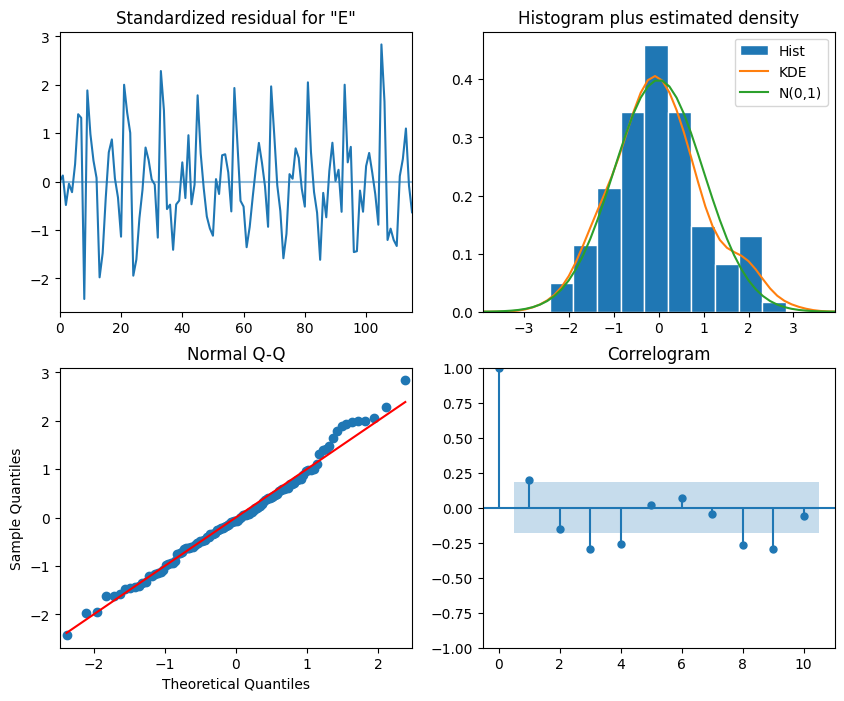

In [ ]:
ARIMA_model_fit.plot_diagnostics(figsize=(10,8));

plt.savefig('figures/CH08_F09_peixeiro.png', dpi=300)

In [ ]:
residuals = ARIMA_model_fit.resid

lbvalue, pvalue = acorr_ljungbox(residuals, np.arange(1, 11, 1))

print(pvalue)

lb_pvalue


In [ ]:
test = df.iloc[-12:]

test['naive_seasonal'] = df['Employees'].iloc[120:132].values
test

,Date,Employees,naive_seasonal
120,2018-01-01,1916.8,1916.8
121,2018-02-01,1944.5,1944.5
122,2018-03-01,1962.2,1962.2
123,2018-04-01,1984.9,1984.9
124,2018-05-01,2001.5,2001.5
125,2018-06-01,2015.3,2015.3
126,2018-07-01,2022.1,2022.1
127,2018-08-01,2019.1,2019.1
128,2018-09-01,1992.5,1992.5
129,2018-10-01,1984.3,1984.3


In [ ]:
ARIMA_pred = ARIMA_model_fit.get_prediction(132, 143).predicted_mean

test['ARIMA_pred'] = ARIMA_pred
test

,Date,Employees,naive_seasonal,ARIMA_pred
120,2018-01-01,1916.8,1916.8,NaN
121,2018-02-01,1944.5,1944.5,NaN
122,2018-03-01,1962.2,1962.2,NaN
123,2018-04-01,1984.9,1984.9,NaN
124,2018-05-01,2001.5,2001.5,NaN
125,2018-06-01,2015.3,2015.3,NaN
126,2018-07-01,2022.1,2022.1,NaN
127,2018-08-01,2019.1,2019.1,NaN
128,2018-09-01,1992.5,1992.5,NaN
129,2018-10-01,1984.3,1984.3,NaN


In [ ]:
SARIMA_model = SARIMAX(train, order=(2,1,1), seasonal_order=(1,1,2,12), simple_differencing=False)
SARIMA_model_fit = SARIMA_model.fit(disp=False)

print(SARIMA_model_fit.summary())

                                        SARIMAX Results                                        
Dep. Variable:                               Employees   No. Observations:                  120
Model:             SARIMAX(2, 1, 1)x(1, 1, [1, 2], 12)   Log Likelihood                -334.449
Date:                                 Thu, 09 May 2024   AIC                            682.899
Time:                                         20:18:00   BIC                            701.608
Sample:                                              0   HQIC                           690.483
                                                 - 120                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6958      0.156      4.458      0.000       0.390       1

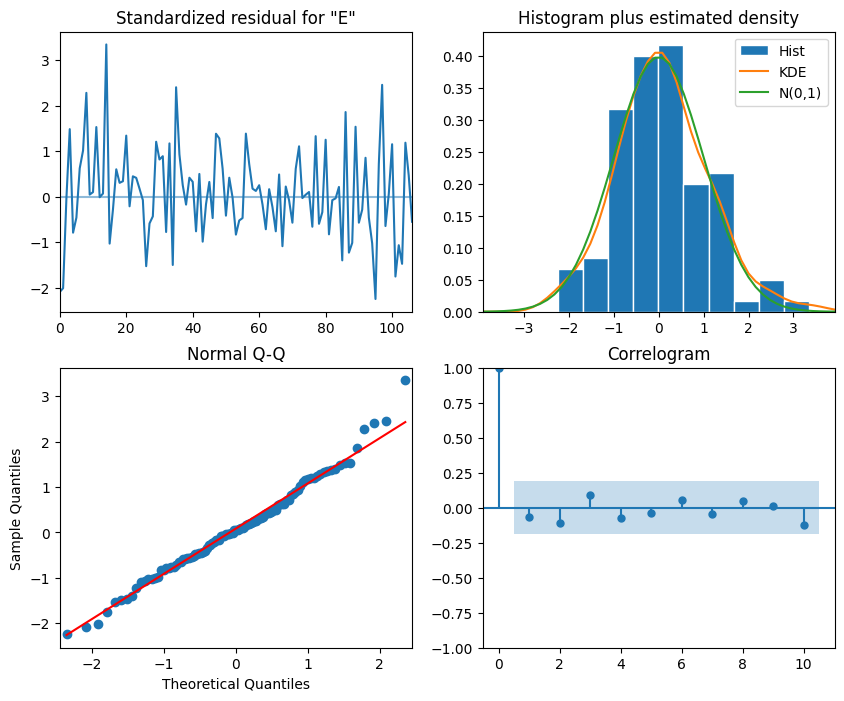

In [ ]:
SARIMA_model_fit.plot_diagnostics(figsize=(10,8));

plt.savefig('figures/CH08_F12_peixeiro.png', dpi=300)

In [ ]:
residuals = SARIMA_model_fit.resid

lbvalue, pvalue = acorr_ljungbox(residuals, np.arange(1, 11, 1))

print(pvalue)

lb_pvalue


In [ ]:
SARIMA_pred = SARIMA_model_fit.get_prediction(132, 143).predicted_mean

test['SARIMA_pred'] = SARIMA_pred
test

,Date,Employees,naive_seasonal,ARIMA_pred,SARIMA_pred
120,2018-01-01,1916.8,1916.8,NaN,NaN
121,2018-02-01,1944.5,1944.5,NaN,NaN
122,2018-03-01,1962.2,1962.2,NaN,NaN
123,2018-04-01,1984.9,1984.9,NaN,NaN
124,2018-05-01,2001.5,2001.5,NaN,NaN
125,2018-06-01,2015.3,2015.3,NaN,NaN
126,2018-07-01,2022.1,2022.1,NaN,NaN
127,2018-08-01,2019.1,2019.1,NaN,NaN
128,2018-09-01,1992.5,1992.5,NaN,NaN
129,2018-10-01,1984.3,1984.3,NaN,NaN


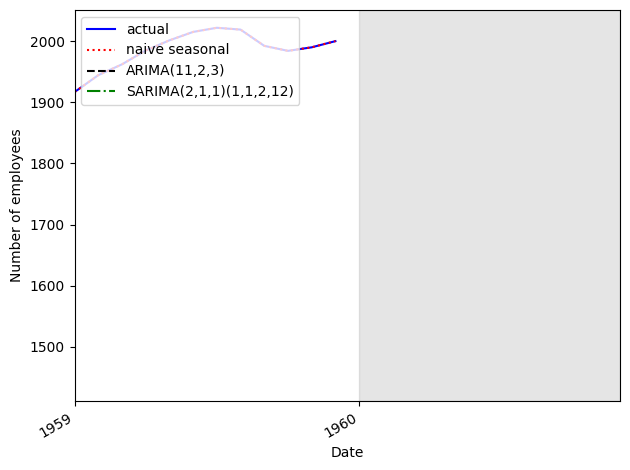

In [ ]:
fig, ax = plt.subplots()

ax.plot(df['Date'], df['Employees'])
ax.plot(test['Employees'], 'b-', label='actual')
ax.plot(test['naive_seasonal'], 'r:', label='naive seasonal')
ax.plot(test['ARIMA_pred'], 'k--', label='ARIMA(11,2,3)')
ax.plot(test['SARIMA_pred'], 'g-.', label='SARIMA(2,1,1)(1,1,2,12)')

ax.set_xlabel('Date')
ax.set_ylabel('Number of employees')
ax.axvspan(132, 143, color='#808080', alpha=0.2)

ax.legend(loc=2)

plt.xticks(np.arange(0, 145, 12), np.arange(1949, 1962, 1))
ax.set_xlim(120, 143)

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/CH08_F13_peixeiro.png', dpi=300)

In [ ]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
mape_naive_seasonal = mape(test['Employees'], test['naive_seasonal'])
mape_ARIMA = mape(test['Employees'], test['ARIMA_pred'])
mape_SARIMA = mape(test['Employees'], test['SARIMA_pred'])

print(mape_naive_seasonal, mape_ARIMA, mape_SARIMA)

0.0 nan nan


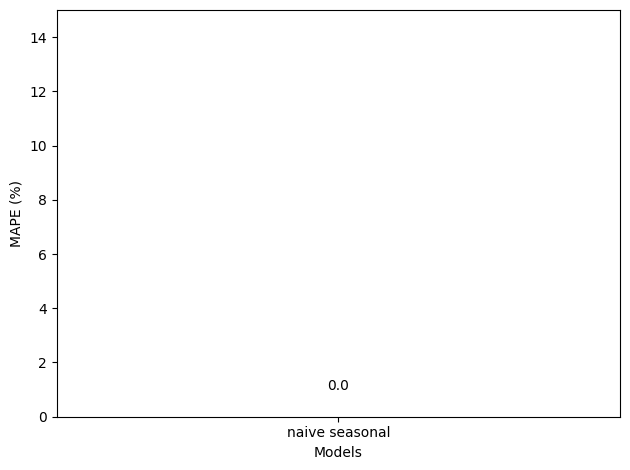

In [ ]:
fig, ax = plt.subplots()

x = ['naive seasonal', 'ARIMA(9,4,0)', 'SARIMA(2,1,1)(1, 2, 0, 1)']
y = [mape_naive_seasonal, mape_ARIMA, mape_SARIMA]

ax.bar(x, y, width=0.4)
ax.set_xlabel('Models')
ax.set_ylabel('MAPE (%)')
ax.set_ylim(0, 15)

for index, value in enumerate(y):
    plt.text(x=index, y=value + 1, s=str(round(value,2)), ha='center')

plt.tight_layout()

plt.savefig('figures/CH08_F14_peixeiro.png', dpi=300)

Time Series Analysis Project Report

  

Title: Seasonal Time Series Analysis of electricity consumption

  

Team Members: [Kevin O'Kelly, Maurice White, Benjiman Darcy]

Part 1: Nonseasonal Time Series Analysis

Introduction

The analysis of time series data is crucial for understanding and predicting trends in various domains. In this section, we delve into the exploration and modeling of a nonseasonal time series dataset focusing on daily electricity consumption. By analyzing historical consumption patterns, our aim is to uncover insights that can inform decision-making processes and aid in future resource planning.

Data Description

The dataset under investigation comprises daily records of electricity consumption, measured in kilowatt-hours (kWh), spanning a specific time period. Each data point represents the electricity consumed on a given day, providing a comprehensive view of consumption patterns over time.

Initial Data Exploration

Before delving into modeling techniques, it is essential to conduct initial data exploration to gain a comprehensive understanding of the dataset. By visualizing the data, we can identify trends, anomalies, and potential areas of interest. The initial data exploration phase involves plotting the electricity consumption data against time, allowing us to observe any apparent patterns or fluctuations in consumption.



Exponential Smoothing Model

Exponential Smoothing is a popular method used for time series forecasting, particularly when dealing with data exhibiting trend or seasonality. In our analysis, we employed an Exponential Smoothing (ETS) model to capture the underlying trend in electricity consumption. This model accounts for the additive trend component in the data, allowing us to model gradual changes over time.

The process of fitting the ETS model involves several steps, including data preprocessing, model parameter selection, and model fitting. Once the model is fitted to the data, we can generate forecasts to predict future consumption trends.

Consumption mean mean_se mean_ci_lower mean_ci_upper 1532 138610.058655 11549.462439 115973.528233 161246.589076 1533 143855.038525 13800.113614 116807.312859 170902.764191 1534 146901.509749 14758.715753 117974.958415 175828.061083 1535 148671.008803 15261.253447 118759.501687 178582.515918 1536 149698.796912 15573.124992 119176.032801 180221.561024 1537 150295.772874 15796.346641 119335.502371 181256.043377 1538 150642.517787 15974.934977 119332.220576 181952.814997 1539 150843.919589 16129.632670 119230.420472 182457.418706 1540 150960.900933 16270.901765 119070.519477 182851.282389 1541 151028.847867 16404.286276 118877.037574 183180.658159

ARIMA Model

In addition to Exponential Smoothing, we explored the application of an Autoregressive Integrated Moving Average (ARIMA) model to our dataset. ARIMA models are commonly used for time series forecasting and are well-suited for capturing autocorrelation and moving average patterns in the data.

The ARIMA model parameters, denoted as (p, d, q), specify the autoregressive, differencing, and moving average components, respectively. By fitting the ARIMA model to the electricity consumption data, we aim to capture any underlying patterns and make accurate forecasts.

Model Forecasting

Forecasting future electricity consumption is a critical aspect of time series analysis, as it enables stakeholders to anticipate demand and plan resources accordingly. Leveraging the fitted ETS and ARIMA models, we generated forecasts to predict future consumption trends.

Correlation matrix of residuals Consumption Production Nuclear Wind Hydroelectric Oil and Gas Coal Solar Biomass Consumption 1.000000 0.355226 -0.016328 0.025804 0.403633 0.306882 0.312122 -0.095863 0.222573 Production 0.355226 1.000000 0.098754 0.786001 0.163323 0.164305 0.043608 -0.102707 0.094915 Nuclear -0.016328 0.098754 1.000000 -0.000521 -0.099328 0.001074 -0.053327 -0.020338 0.002968 Wind 0.025804 0.786001 -0.000521 1.000000 -0.328093 -0.275314 -0.325331 -0.138225 0.006780 Hydroelectric 0.403633 0.163323 -0.099328 -0.328093 1.000000 0.221967 0.289492 -0.045996 0.099101 Oil and Gas 0.306882 0.164305 0.001074 -0.275314 0.221967 1.000000 0.199082 -0.045710 0.075433 Coal 0.312122 0.043608 -0.053327 -0.325331 0.289492 0.199082 1.000000 -0.047936 0.044133 Solar -0.095863 -0.102707 -0.020338 -0.138225 -0.045996 -0.045710 -0.047936 1.000000 0.038898 Biomass 0.222573 0.094915 0.002968 0.006780 0.099101 0.075433 0.044133 0.038898 1.000000

Conclusion

In conclusion, the nonseasonal time series analysis of daily electricity consumption has provided valuable insights into consumption patterns and trends. By employing Exponential Smoothing and ARIMA models, we were able to capture underlying patterns in the data and generate forecasts for future consumption. These insights can inform decision-making processes and assist in effective resource planning.

